# License Plate Detection - Data Collection and Exploration
Welcome to the traffic light detection! This notebook explains step-by-step how to train and use license plate detection models for the Machine Learning Engineer Capstone Project. Make sure you meet all preconditions before you start, see README.md.

### Imports

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import matplotlib

from matplotlib import pyplot as plt
from PIL import Image

Test Tensorflow...

In [2]:
print ("Tensorflow: {}".format(tf.__version__))

import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Tensorflow: 1.15.2
Default GPU Device: /device:GPU:0


### Env setup

In [3]:
# This is needed to display the images.
%matplotlib inline

os.chdir(os.path.join(os.getcwd(), 'tf_object_detection'))
working_dir = os.getcwd()

sys.path.append(working_dir)
sys.path.append(working_dir + "/slim")

path = working_dir + ';' + working_dir + '/slim' + ';' + working_dir + '/object_detection'
os.environ['PYTHONPATH'] = path

os.chdir(os.path.join(os.getcwd(), 'object_detection'))

### Object detection imports
Here are the imports from the object detection module.

In [4]:
import object_detection

### Model preparation

#### Variables
Define the pretrained model to be used.
Change MODEL if you want to use other pretrained models, see the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [5]:
# choose pretrained model
MODEL = 'ssdlite_mobilenet_v2_coco_2018_05_09'
PIPELINE_CONFING_FILENAME = 'ssdlite_mobilenet_v2_coco.config'

NUM_CLASSES = 1

In [8]:
# ****************** don't edit ******************

# What model to download.
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
PRETRAIND_MODELS_DIR = 'models'

# List of the strings that is used to add correct label for each box.
DETECTION_COFIG_DIR = '../../config/plate_detection'
PATH_TO_LABELS = os.path.join(DETECTION_COFIG_DIR, 'labels_map.pbtxt')

PIPELINE_CONFING_FILEPATH = os.path.join(DETECTION_COFIG_DIR, PIPELINE_CONFING_FILENAME)

OUTPUT_DIR = '../../output/plate_detection'
CHECKPOINTS_DIR = OUTPUT_DIR + '/checkpoints/' + MODEL
FINETUNED_MODEL_DIR = OUTPUT_DIR + '/fine_tuned_models/' + MODEL

# Path to frozen detection graph.
FINETUNED_MODEL = os.path.join(FINETUNED_MODEL_DIR, 'frozen_inference_graph.pb')

print ('Labels file:           {}'.format(PATH_TO_LABELS))
print ('Pipeline config file:  {}'.format(PIPELINE_CONFING_FILEPATH))
print ('Checkpoints directory: {}'.format(CHECKPOINTS_DIR))
print ('Model file:            {}'.format(FINETUNED_MODEL))

Labels file:           ../../config/plate_detection\labels_map.pbtxt
Pipeline config file:  ../../config/plate_detection\ssdlite_mobilenet_v2_coco.config
Checkpoints directory: ../../output/plate_detection/checkpoints/ssdlite_mobilenet_v2_coco_2018_05_09
Model file:            ../../output/plate_detection/fine_tuned_models/ssdlite_mobilenet_v2_coco_2018_05_09\frozen_inference_graph.pb


# Train Traffic Light Detection Model

**NOTE:** If you have already trained the model, you can skip the training- and export steps and proceed directly with testing...

### Download Pretrained Model

**NOTE:** This step only needs to be done once if the pretrained model has not been downloaded yet!

In [10]:
MODEL_ZIP = os.path.join(PRETRAIND_MODELS_DIR, MODEL_FILE)
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_ZIP)
tar_file = tarfile.open(MODEL_ZIP)
tar_file.extractall(os.path.join(os.getcwd(), PRETRAIND_MODELS_DIR))
tar_file.close()

### Train Finetuned Model

Starts the training. This step may take several hours, depending on the computing power of your computer.
You can monitor the training process using tensorboard tensorboard --logdir=%CHECKPOINTS_DIR% and stop the training if once the desired accuracy has been achieved.

In [8]:
%run model_main.py --pipeline_config_path={PIPELINE_CONFING_FILEPATH} --model_dir={CHECKPOINTS_DIR}

creating index...
index created!
creating index...
index created!


2020-03-15 18:43:36.810228: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_100.dll
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0315 18:43:40.093340 19628 module_wrapper.py:139] From D:\development\mlnd\German_License_Plate_Recognition\tf_object_detection\object_detection\utils\config_util.py:102: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0315 18:43:40.108338 19628 module_wrapper.py:139] From D:\development\mlnd\German_License_Plate_Recognition\tf_object_detection\object_detection\model_lib.py:628: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging

Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.
Instructions for updating:
Use `tf.data.Dataset.map()
W0315 18:43:40.158583 19628 deprecation.py:323] From D:\development\mlnd\German_License_Plate_Recognition\tf_object_detection\object_detection\builders\dataset_builder.py:155: DatasetV1.map_with_legacy_function (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.map()

W0315 18:43:40.984612 19628 module_wrapper.py:139] From C:\Users\Andreas\Anaconda3\envs\tf1.15\lib\site-packages\tensorflow_core\python\autograph\converters\directives.py:119: The name tf.logging.warn is deprecated. Please use tf.compat.v1.logging.warn instead.


W0315 18:43:45.445661 19628 module_wrapper.py:139] From C:\Users\Andreas\Anaconda3\envs\tf1.15\lib\site-

### Export Finetuned Model
If the training is finished, the model must be exported so that it can be used.

Set CHECKPOINT_NO = 'XXX' where XXX is the number of the last checkpoint file in CHECKPOINTS_DIR, before you start the export.

In [11]:
CHECKPOINT_NO = 20000

!python export_inference_graph.py --pipeline_config_path={PIPELINE_CONFING_FILEPATH} --trained_checkpoint_prefix={CHECKPOINTS_DIR}/model.ckpt-{CHECKPOINT_NO} --output_directory={FINETUNED_MODEL_DIR}

Parsing Inputs...

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              0
-min_occurrence             0
-step                       -1
-order_by                   name
-account_type_regexes       _trainable_variables
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     params
-output                     stdout:

==================Model Analysis Report======================

Doc:
scope: The nodes in the model graph are organized by their names, which is hierarchical like filesystem.




W0315 15:07:42.400795  4716 deprecation_wrapper.py:119] From export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0315 15:07:42.432081  4716 deprecation_wrapper.py:119] From D:\development\mlnd\German_License_Plate_Recognition\tf_object_detection\object_detection\exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0315 15:07:42.432081  4716 deprecation_wrapper.py:119] From D:\development\mlnd\German_License_Plate_Recognition\tf_object_detection\object_detection\exporter.py:121: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0315 15:07:42.460044  4716 deprecation_wrapper.py:119] From D:\development\mlnd\German_License_Plate_Recognition\tf_object_detection\object_detection\core\preprocessor.py:2937: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.


W0315 15:07:42.482074  4716 deprecation_wrapper.py:119] F

param: Number of parameters (in the Variable).

Profile:
node name | # parameters
_TFProfRoot (--/3.20m params)
  BoxPredictor_0 (--/93.33k params)
    BoxPredictor_0/BoxEncodingPredictor (--/62.22k params)
      BoxPredictor_0/BoxEncodingPredictor/biases (12, 12/12 params)
      BoxPredictor_0/BoxEncodingPredictor/weights (3x3x576x12, 62.21k/62.21k params)
    BoxPredictor_0/ClassPredictor (--/31.11k params)
      BoxPredictor_0/ClassPredictor/biases (6, 6/6 params)
      BoxPredictor_0/ClassPredictor/weights (3x3x576x6, 31.10k/31.10k params)
  BoxPredictor_1 (--/138.25k params)
    BoxPredictor_1/BoxEncodingPredictor (--/92.17k params)
      BoxPredictor_1/BoxEncodingPredictor/biases (8, 8/8 params)
      BoxPredictor_1/BoxEncodingPredictor/weights (3x3x1280x8, 92.16k/92.16k params)
    BoxPredictor_1/ClassPredictor (--/46.08k params)
      BoxPredictor_1/ClassPredictor/biases (4, 4/4 params)
      BoxPredictor_1/ClassPredictor/weights (3x3x1280x4, 46.08k/46.08k params)
  BoxPredicto


W0315 15:07:42.798073  4716 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x0000025593D15548>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x0000025593D15548>>: AssertionError: Bad argument number for Name: 3, expecting 4
W0315 15:07:42.820073  4716 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x000002559A5C67C8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormali

W0315 15:07:43.690080  4716 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x000002559A514548>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x000002559A514548>>: AssertionError: Bad argument number for Name: 3, expecting 4
W0315 15:07:43.712073  4716 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x000002559A3BB748>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormaliz


    BoxPredictor_5/ClassPredictor (--/4.61k params)
      BoxPredictor_5/ClassPredictor/biases (4, 4/4 params)
      BoxPredictor_5/ClassPredictor/weights (3x3x128x4, 4.61k/4.61k params)
  FeatureExtractor (--/2.84m params)
    FeatureExtractor/MobilenetV2 (--/2.84m params)
      FeatureExtractor/MobilenetV2/Conv (--/864 params)
        FeatureExtractor/MobilenetV2/Conv/BatchNorm (--/0 params)
        FeatureExtractor/MobilenetV2/Conv/weights (3x3x3x32, 864/864 params)
      FeatureExtractor/MobilenetV2/Conv_1 (--/409.60k params)
        FeatureExtractor/MobilenetV2/Conv_1/BatchNorm (--/0 params)
        FeatureExtractor/MobilenetV2/Conv_1/weights (1x1x320x1280, 409.60k/409.60k params)
      FeatureExtractor/MobilenetV2/expanded_conv (--/800 params)
        FeatureExtractor/MobilenetV2/expanded_conv/depthwise (--/288 params)
          FeatureExtractor/MobilenetV2/expanded_conv/depthwise/BatchNorm (--/0 params)
          FeatureExtractor/MobilenetV2/expanded_conv/depthwise/depthwise_we

# Test Traffic Light Detection

Uses the fine tuned traffic light detection model FINETUNED_MODEL_DIR to detect traffic lights in images.

#### Load the (frozen) finetuned model into memory.

In [9]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(FINETUNED_MODEL, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

### Loading label map
Loads the label map file PATH_TO_LABELS. This file contains a map that assigns category names to the class-indices:

item { id: 1 name: 'Green' }

item { id: 2 name: 'Yellow' }

item { id: 3 name: 'Red' }

In [10]:
from object_detection.utils import label_map_util

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [11]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

In [15]:
import glob

PATH_TO_TEST_IMAGES_DIR = '../../data/plate_detection/test_images'

TEST_IMAGE_PATHS = []
for filename in glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg')):
    TEST_IMAGE_PATHS.append(filename)
    
print ('{} test images found in {}'.format(len(TEST_IMAGE_PATHS), PATH_TO_TEST_IMAGES_DIR))

9 test images found in ../../data/plate_detection/test_images


C:\Users\Andreas\Anaconda3\envs\tf1.15\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


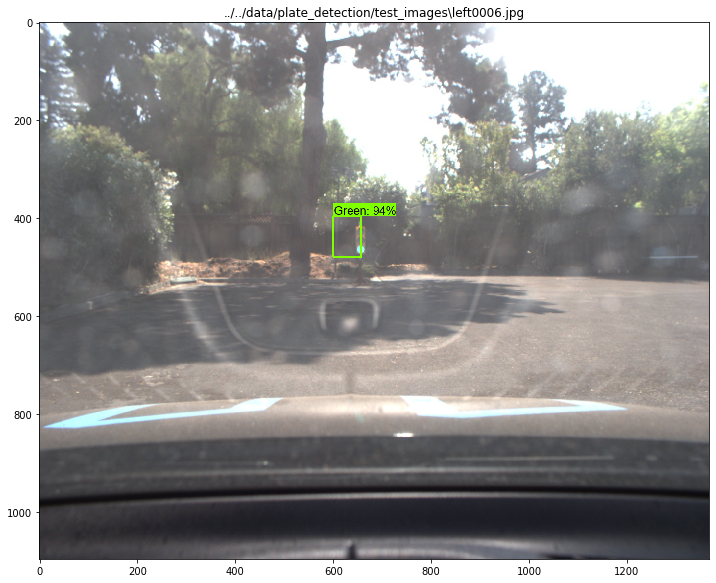

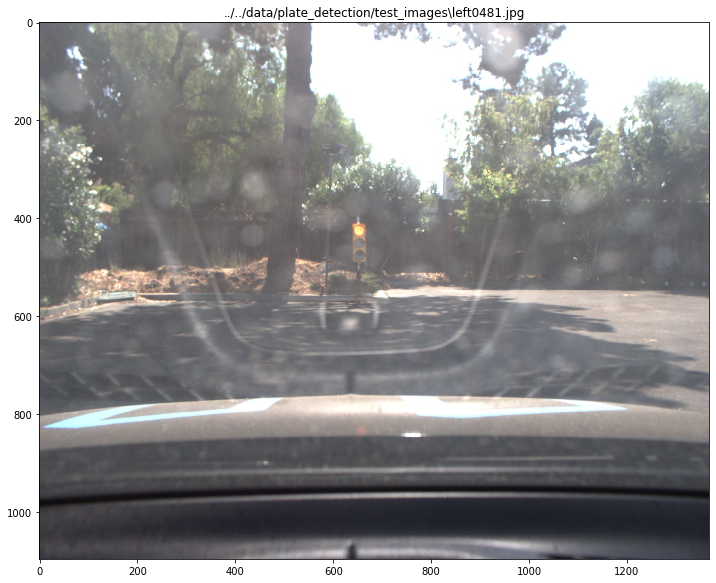

In [16]:
from utils import visualization_utils as vis_util

# number of samples to test; -1 <=> all
NUM_SAMPLES = 2

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 12)

if NUM_SAMPLES > 0:
    test_images = np.random.choice(TEST_IMAGE_PATHS, size = NUM_SAMPLES, replace=False)
else:
    test_images = TEST_IMAGE_PATHS

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in test_images:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections], feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=4)
            plt.figure(figsize=IMAGE_SIZE)
            plt.title(image_path)
            plt.imshow(image_np)
            plt.show()